# Рабочая тетрадь 4

## Петренко Егор, ББСО-01-21

### Задание 1:

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

1.0600000000000003 -1.4800000000000009


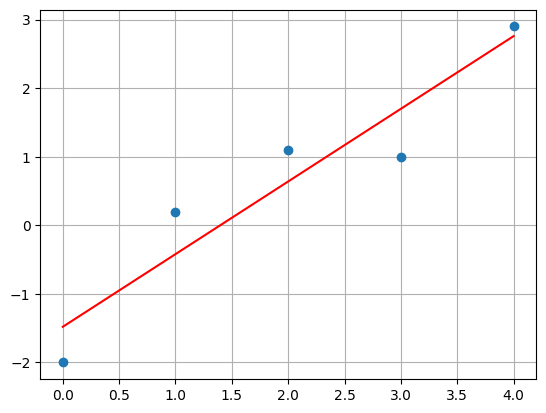

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4])
y = np.array([-2, 0.2, 1.1, 1, 2.9])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.grid()
plt.plot(x, y, 'o')
plt.plot(x, m*x+c, 'r')

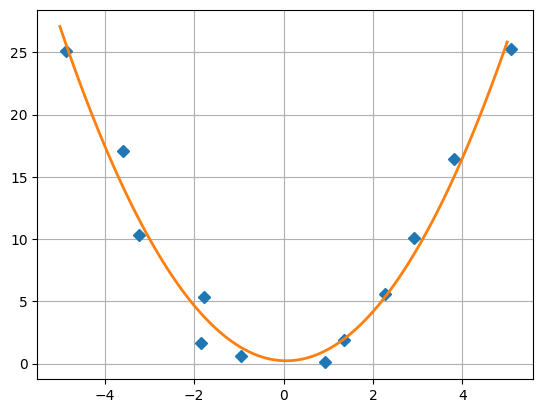

In [19]:
from numpy import *
from numpy.random import *

delta = 1.0
N = 12
x = linspace(-5, 5, N)
y = x**2+delta*(rand(N)-0.5)
x += delta*(rand(N)-0.5)

m = vstack((x**2, x, np.ones(N))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5,5,101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec +s[2],'-',lw=2 )
plt.grid()

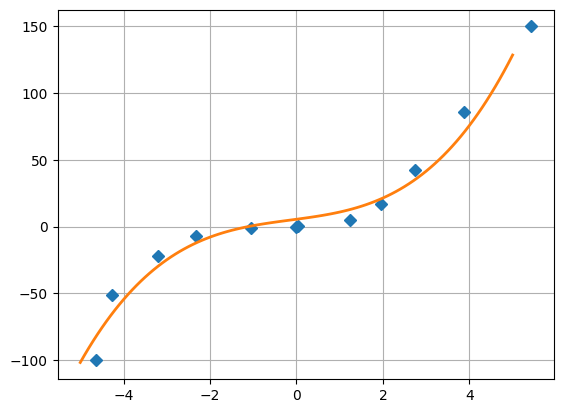

In [20]:
from numpy import *
from numpy.random import *

delta = 1.0
N = 12
x = linspace(-5, 5, N)
y = x**3 + x**2+delta*(rand(N)-0.5)
x += delta*(rand(N)-0.5)

m = vstack((x**3, x**2, x, np.ones(N))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5,5,101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=2 )
plt.grid()

### Задание 2:
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[0.23890294 0.75253647]
0.00012292610190969456
0.10809018887972796


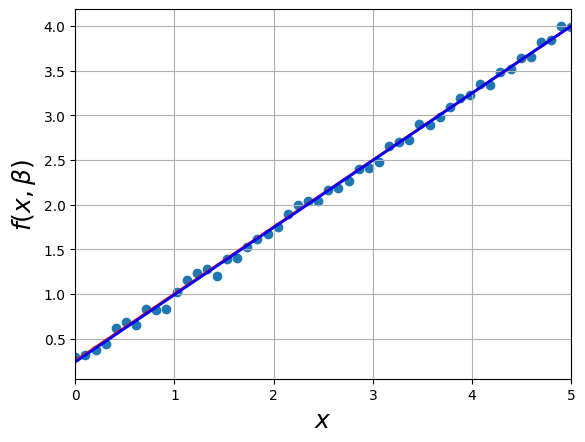

In [36]:
from scipy.optimize import curve_fit

beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1*x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)

print(beta_opt)

len_dev = sum(beta_cov[0])
print(len_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

ax = plt.subplot()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.grid()
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

### Пример

   Учебное время  Оценка
0           0.50      10
1           0.75      22
2           1.00      14
3           1.25      43
4           1.50      20
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.887500  53.750000
std         1.501041  26.355615
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.875000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


<function matplotlib.pyplot.show(close=None, block=None)>

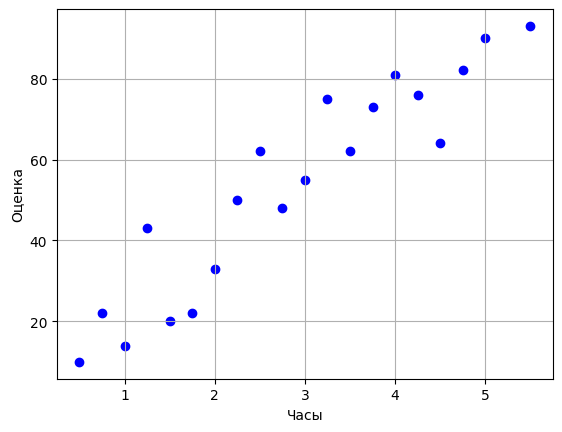

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = { 'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.5, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
            'Оценка': [10, 22, 14, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}
dataset = pd.DataFrame(my_dict)
print(dataset.head())
print(dataset.describe())

plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.grid()
plt.show

In [24]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

3.4127358490566024
[17.12264151]


   Actual  Predicted
0      90  89.025943
1      22  16.254717
2      93  97.587264
3      62  46.219340


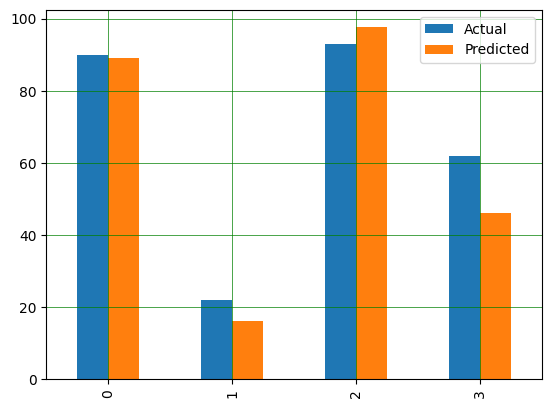

In [25]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

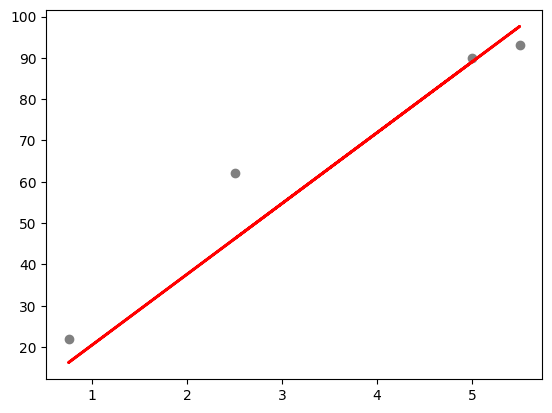

In [26]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Задание 3:
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
[[ 1.1  1. ]
 [ 1.3  1. ]
 [ 1.5  1. ]
 [ 2.   1. ]
 [ 2.2  1. ]
 [ 2.9  1. ]
 [ 3.   1. ]
 [ 3.2  1. ]
 [ 3.2  1. ]
 [ 3.7  1. ]
 [ 3.9  1. ]
 [ 4.   1. ]
 [ 4.   1. ]
 [ 4.1  1. ]
 [ 4.5  1. ]
 [ 4.9  1. ]
 [ 5.1  1. ]
 [ 5.3  1. ]
 [ 5.9  1. ]
 [ 6.   1. ]
 [ 6.8  1. ]
 [ 7.1  1. ]
 [ 7.9  1. ]
 [ 8.2  1. ]
 [ 8.7  1. ]
 [ 9.   1. ]
 [ 9.5  1. ]
 [ 9.6  1. ]
 [10.3  1. ]
 [10.5  1. ]]

y=m*x+c
m= 9449.962321455074  c= 25792.20019866871 



<function matplotlib.pyplot.show(close=None, block=None)>

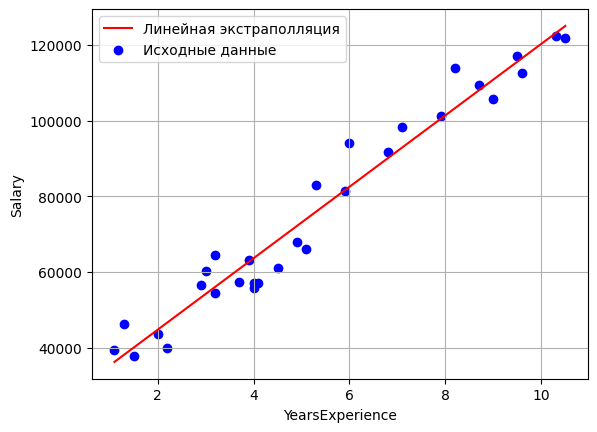

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


dataset = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
print(dataset.head())
print(dataset.describe())


A = np.vstack([dataset['YearsExperience'], np.ones(len(dataset['YearsExperience']))]).T
print(A)

m, c = np.linalg.lstsq(A, dataset['Salary'], rcond=None)[0]
print('\ny=m*x+c')
print("m=", m," c=", c, "\n")

plt.plot(dataset['YearsExperience'], m*dataset['YearsExperience']+c, 'r', label='Линейная экстраполляция')
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label='Исходные данные')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.grid()
plt.legend()
plt.show

In [28]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


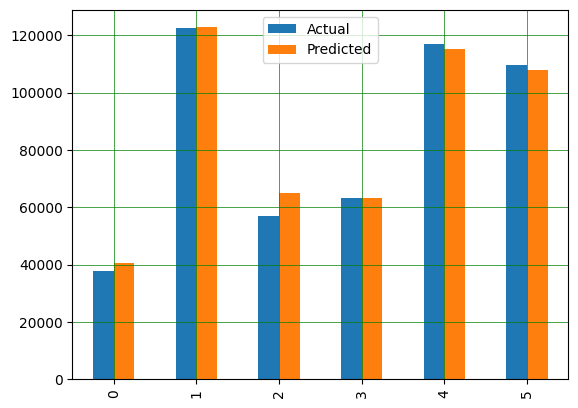

In [29]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

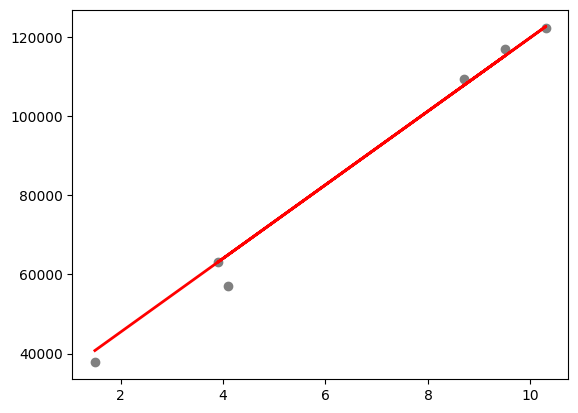

In [30]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Задание 4:
Задача:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset=pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
dataset
x = dataset[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption']]
y = dataset['Petrol_tax']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))

                              Coefficient
Average_income                  -0.000107
Paved_Highways                  -0.000152
Population_Driver_licence(%)     2.110354
Petrol_Consumption              -0.005058
Mean Squared Error 0.4587686097483714


### Задание*:
Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

Вариант 8
x     y
5,0 3,0
5,2 2,0
5,4 5,0
5,6 2,0
5,8 2,0
6,0 3,0

-0.4285714285714262 5.190476190476176


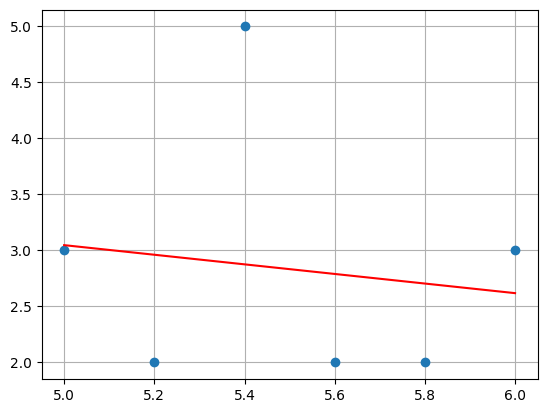

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([3.0, 2.0, 5.0, 2.0, 2.0, 3.0])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.grid()
plt.plot(x, y, 'o')
plt.plot(x, m*x+c, 'r')

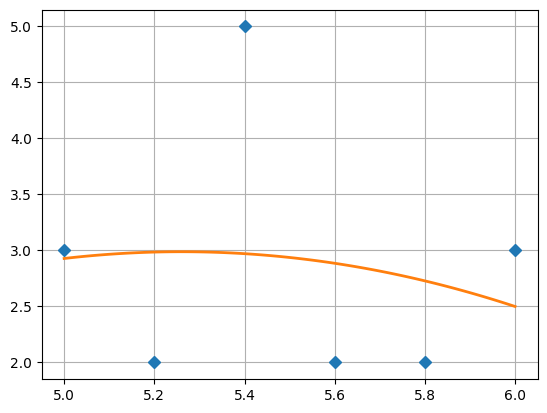

In [33]:
m = np.vstack((x**2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(5,6,101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec +s[2],'-',lw=2 )
plt.grid()

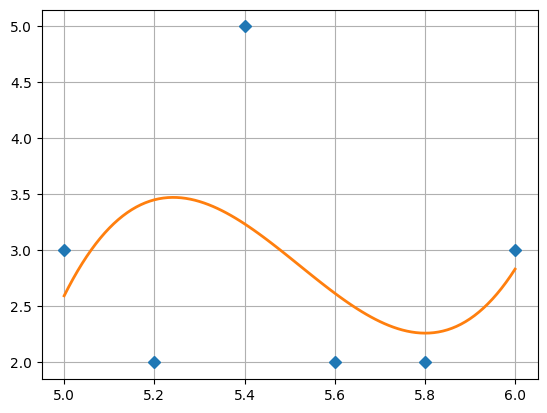

In [34]:
m = vstack((x**3, x**2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(5,6,101)

plt.plot(x, y, 'D')

plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3],'-',lw=2 )
plt.grid()